In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Train.csv')
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [10]:
df.shape

(10999, 12)

In [3]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [6]:
df.dtypes

ID                      int64
Warehouse_block        object
Mode_of_Shipment       object
Customer_care_calls     int64
Customer_rating         int64
Cost_of_the_Product     int64
Prior_purchases         int64
Product_importance     object
Gender                 object
Discount_offered        int64
Weight_in_gms           int64
Reached.on.Time_Y.N     int64
dtype: object

# Exploratory Data Analysis

<AxesSubplot: xlabel='Reached.on.Time_Y.N', ylabel='Weight_in_gms'>

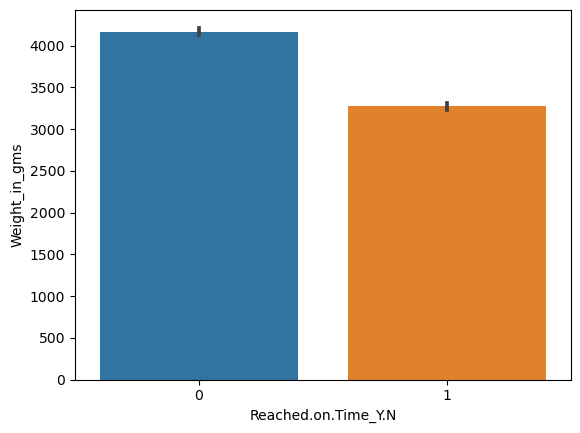

In [8]:
sns.barplot(data=df, x="Reached.on.Time_Y.N", y="Weight_in_gms")

- Heavy objects doesn't reach on time as compared to light objects

<AxesSubplot: xlabel='Reached.on.Time_Y.N', ylabel='count'>

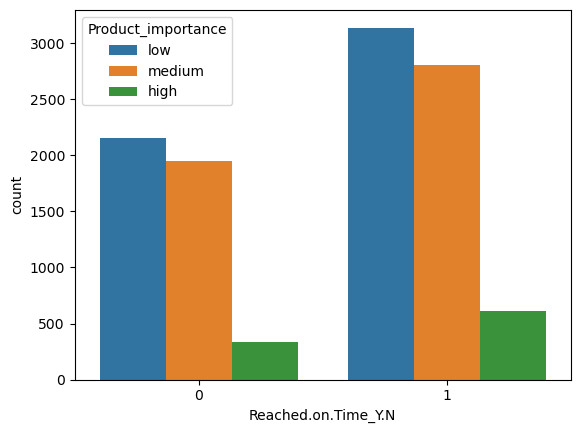

In [14]:
sns.countplot(data=df, x="Reached.on.Time_Y.N", hue="Product_importance")

<AxesSubplot: xlabel='Product_importance', ylabel='Discount_offered'>

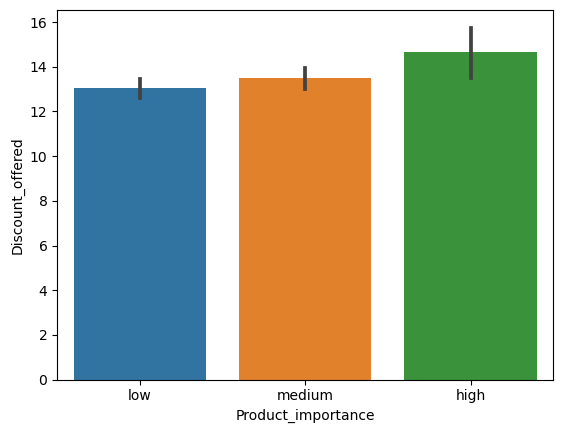

In [15]:
sns.barplot(data=df, x='Product_importance', y='Discount_offered')

- More the discount, more important is the product

<AxesSubplot: xlabel='Product_importance', ylabel='Cost_of_the_Product'>

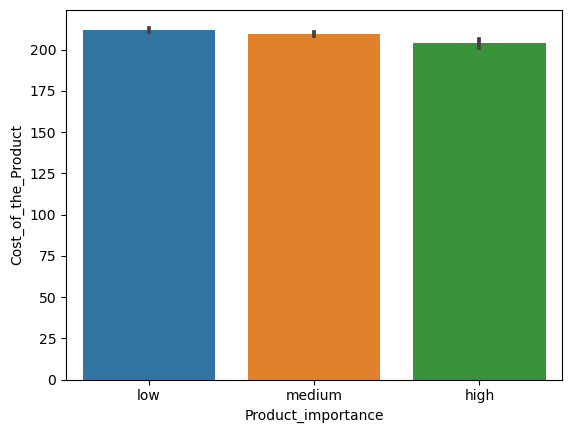

In [16]:
sns.barplot(data=df, x='Product_importance', y='Cost_of_the_Product')

- More the product importance, lower its cost

<AxesSubplot: xlabel='Reached.on.Time_Y.N', ylabel='count'>

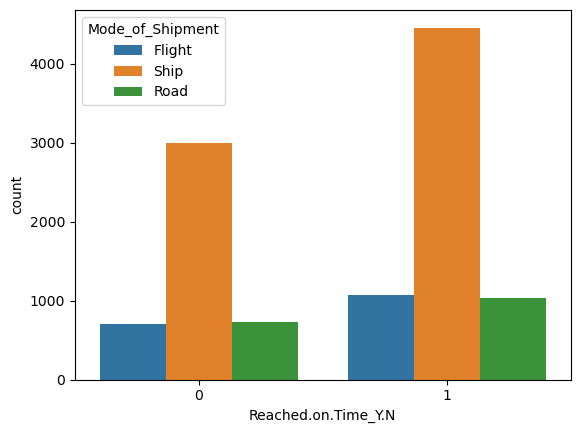

In [17]:
sns.countplot(data=df, x="Reached.on.Time_Y.N", hue="Mode_of_Shipment")

<AxesSubplot: xlabel='Product_importance', ylabel='count'>

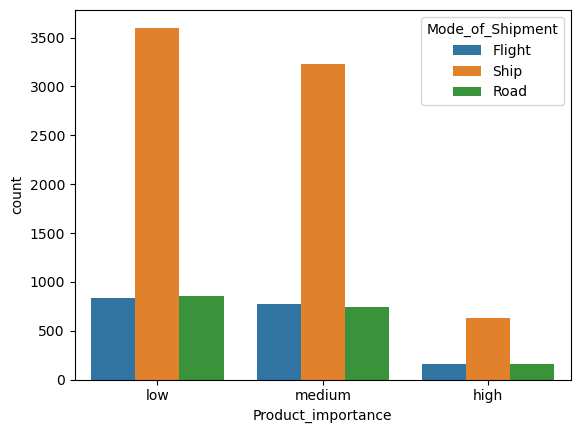

In [18]:
sns.countplot(data=df, x="Product_importance", hue='Mode_of_Shipment')

- lower importance product has arrived from ship

# Data Preprocessing

In [19]:
df['Warehouse_block'].unique()

array(['D', 'F', 'A', 'B', 'C'], dtype=object)

In [20]:
df['Mode_of_Shipment'].unique()

array(['Flight', 'Ship', 'Road'], dtype=object)

In [21]:
df['Product_importance'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [22]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [23]:
temp = pd.DataFrame(index=df.columns)
temp['nunique_values'] = df.nunique()
temp['n_null_values'] = df.isnull().sum()
temp['data_types'] = df.dtypes
temp

,nunique_values,n_null_values,data_types
ID,10999,0,int64
Warehouse_block,5,0,object
Mode_of_Shipment,3,0,object
Customer_care_calls,6,0,int64
Customer_rating,5,0,int64
Cost_of_the_Product,215,0,int64
Prior_purchases,8,0,int64
Product_importance,3,0,object
Gender,2,0,object
Discount_offered,65,0,int64


- Dataset has 0 null values
- This means dataset is already clean

In [27]:
### Label encodding the object datatype: Warehouse_block, Mode_of_shipment, Product_importance and Gender
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [28]:
df['Warehouse_block'] = label_encoder.fit_transform(df['Warehouse_block'])
df['Warehouse_block'].unique()

array([3, 4, 0, 1, 2])

In [32]:
df['Mode_of_Shipment'] = label_encoder.fit_transform(df['Mode_of_Shipment'])
df['Mode_of_Shipment'].unique()

array([0, 2, 1])

In [34]:
df['Product_importance'] = label_encoder.fit_transform(df['Product_importance'])
df['Product_importance'].unique()

array([1, 2, 0])

In [35]:
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Gender'].unique()

array([0, 1])

In [36]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,3,0,4,2,177,3,1,0,44,1233,1
1,2,4,0,4,5,216,2,1,1,59,3088,1
2,3,0,0,2,2,183,4,1,1,48,3374,1
3,4,1,0,3,3,176,4,2,1,10,1177,1
4,5,2,0,2,2,184,3,2,0,46,2484,1


In [37]:
df.dtypes

ID                     int64
Warehouse_block        int64
Mode_of_Shipment       int64
Customer_care_calls    int64
Customer_rating        int64
Cost_of_the_Product    int64
Prior_purchases        int64
Product_importance     int64
Gender                 int64
Discount_offered       int64
Weight_in_gms          int64
Reached.on.Time_Y.N    int64
dtype: object

- Now, all the data types are in numerical values

# Checking for outliers

<AxesSubplot: xlabel='Cost_of_the_Product'>

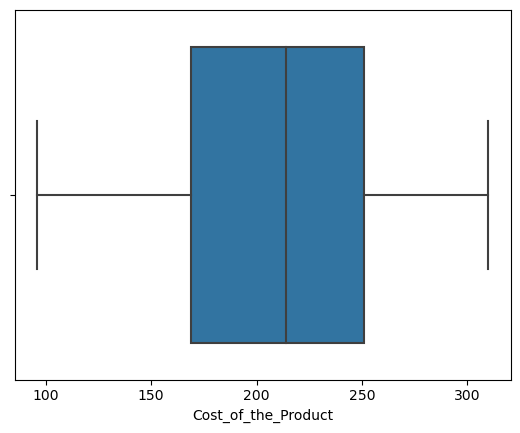

In [38]:
sns.boxplot(x=df['Cost_of_the_Product'])

<AxesSubplot: xlabel='Discount_offered'>

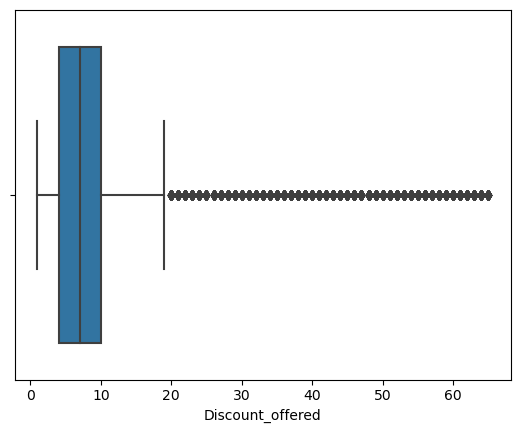

In [39]:
sns.boxplot(x=df['Discount_offered'])

<AxesSubplot: xlabel='Weight_in_gms'>

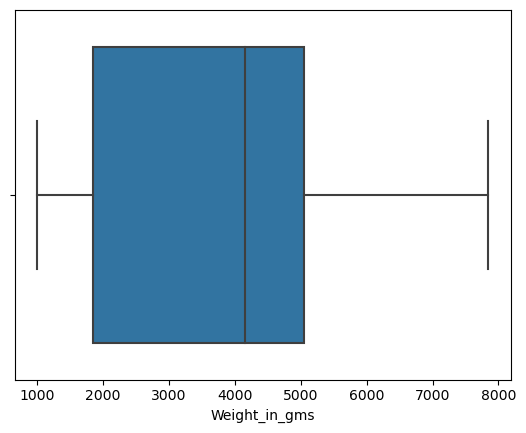

In [40]:
sns.boxplot(x=df['Weight_in_gms'])

## Delete the Outlier Using Z-Score

In [121]:
import scipy.stats as stats
z = np.abs(stats.zscore(df))
data_clean = df[(z<3).all(axis = 1)]
data_clean.shape

(10642, 12)

# Balancing the Class Value

1    6282
0    4360
Name: Reached.on.Time_Y.N, dtype: int64

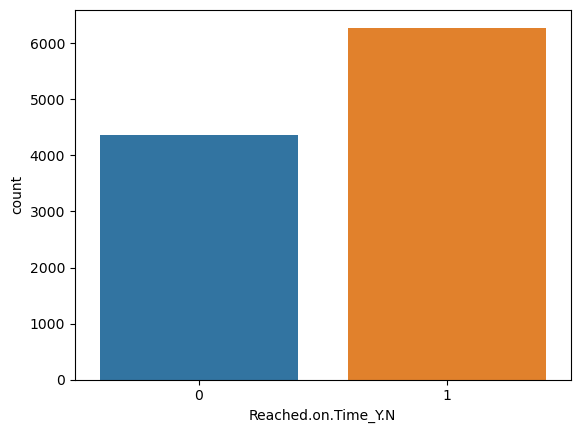

In [122]:
# Counting 1 and 0 Value in stroke column
sns.countplot(x=data_clean['Reached.on.Time_Y.N'])
data_clean['Reached.on.Time_Y.N'].value_counts()

In [124]:
from sklearn.utils import resample

# Create two different dataframe of majority and minority class

df_majority = data_clean[(data_clean['Reached.on.Time_Y.N']==1)]
df_minority = data_clean[(data_clean['Reached.on.Time_Y.N']==0)]

# Upsmapled minority class
df_minority_upsampled = resample(df_minority, replace=True, n_samples=6282, random_state=0)

# Combine majority class with upsampled minority class

df_upsampled = pd.concat([df_minority_upsampled, df_majority])

0    6282
1    6282
Name: Reached.on.Time_Y.N, dtype: int64

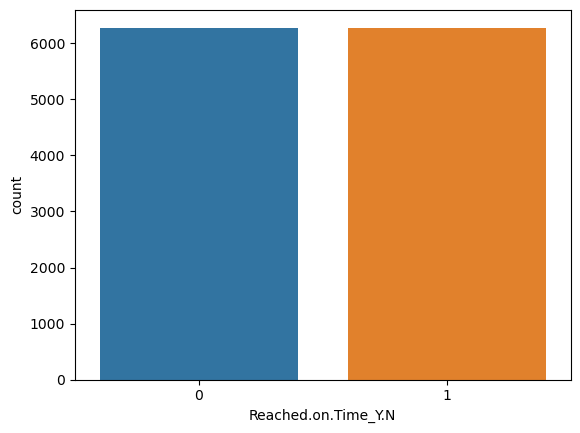

In [125]:
sns.countplot(x=df_upsampled['Reached.on.Time_Y.N'])
df_upsampled['Reached.on.Time_Y.N'].value_counts()

In [126]:
df_upsampled.corr()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
ID,1.000000,-0.004031,-0.002197,0.184646,-0.012559,0.183367,0.177367,0.037248,0.000108,-0.578236,0.229682,-0.418435
Warehouse_block,-0.004031,1.000000,-0.008947,0.015408,0.013999,-0.011878,-0.017807,-0.005213,-0.015517,0.005731,0.006684,0.002930
Mode_of_Shipment,-0.002197,-0.008947,1.000000,-0.008925,-0.005049,0.010257,-0.001489,0.006799,-0.008400,0.004637,-0.004824,-0.003797
Customer_care_calls,0.184646,0.015408,-0.008925,1.000000,0.017324,0.328652,0.251216,-0.001576,0.004575,-0.124304,-0.304531,-0.069751
Customer_rating,-0.012559,0.013999,-0.005049,0.017324,1.000000,0.006268,0.009140,0.005920,0.012163,0.001906,-0.014667,0.010531
Cost_of_the_Product,0.183367,-0.011878,0.010257,0.328652,0.006268,1.000000,0.170499,0.011690,0.026529,-0.128581,-0.188768,-0.069686
Prior_purchases,0.177367,-0.017807,-0.001489,0.251216,0.009140,0.170499,1.000000,0.018892,-0.010768,-0.099141,-0.251241,-0.064212
Product_importance,0.037248,-0.005213,0.006799,-0.001576,0.005920,0.011690,0.018892,1.000000,-0.009993,-0.010951,-0.000024,-0.026076
Gender,0.000108,-0.015517,-0.008400,0.004575,0.012163,0.026529,-0.010768,-0.009993,1.000000,-0.009133,-0.011810,0.010189
Discount_offered,-0.578236,0.005731,0.004637,-0.124304,0.001906,-0.128581,-0.099141,-0.010951,-0.009133,1.000000,-0.351962,0.419707


<AxesSubplot: >

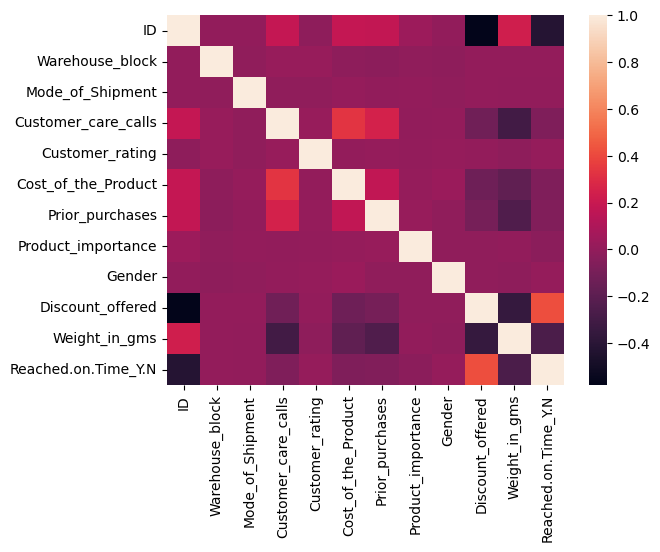

In [127]:
sns.heatmap(df_upsampled.corr())

# Machine Learning Model Building

In [128]:
df_upsampled.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

In [129]:
X = df_upsampled.drop(['Reached.on.Time_Y.N','ID'], axis=1)
y = df_upsampled['Reached.on.Time_Y.N']

In [130]:
X.shape

(12564, 10)

In [131]:
y.shape

(12564,)

In [132]:
#Splitting the data into train and test

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [134]:
X_train.shape

(10051, 10)

In [135]:
X_test.shape

(2513, 10)

In [136]:
y_train.shape

(10051,)

In [137]:
y_test.shape

(2513,)

## Decision Tree Classifier

In [138]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [139]:
y_pred = tree.predict(X_test)

print('Accuracy Score:', round(accuracy_score(y_test, y_pred)*100, 2), '%')

Accuracy Score: 78.15 %


In [140]:
print('F-1 Score:', (f1_score(y_test, y_pred)))
print('Precision Score:', (precision_score(y_test, y_pred)))
print('Recall Score:', (recall_score(y_test, y_pred)))

F-1 Score: 0.7620286085825748
Precision Score: 0.8123844731977818
Recall Score: 0.7175510204081633


## Random Forest Classifier

In [141]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=42,n_jobs=-1)
forest.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [142]:
y_pred = forest.predict(X_test)

print('Accuracy Score:', round(accuracy_score(y_test, y_pred)*100, 2), '%')

Accuracy Score: 76.32 %


In [143]:
print('F-1 Score:', (f1_score(y_test, y_pred)))
print('Precision Score:', (precision_score(y_test, y_pred)))
print('Recall Score:', (recall_score(y_test, y_pred)))

F-1 Score: 0.7192071731949032
Precision Score: 0.8523489932885906
Recall Score: 0.6220408163265306


## Logistic Regression

In [144]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42, n_jobs=-1)
lr.fit(X_train, y_train)

LogisticRegression(n_jobs=-1, random_state=42)

In [145]:
y_pred = lr.predict(X_test)
print('Accuracy Score:', round(accuracy_score(y_test, y_pred)*100, 2), '%')

Accuracy Score: 66.77 %


In [146]:
print('F-1 Score:', (f1_score(y_test, y_pred)))
print('Precision Score:', (precision_score(y_test, y_pred)))
print('Recall Score:', (recall_score(y_test, y_pred)))

F-1 Score: 0.5936739659367396
Precision Score: 0.7349397590361446
Recall Score: 0.49795918367346936


- Decision Tree model has the most accurate score

In [147]:
df.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

## Predicting wheter a product will reach on time or not


In [166]:
Warehouse = dict(zip(['D', 'F', 'A', 'B', 'C'], [3, 4, 0, 1, 2]))
Mode = dict(zip(['Flight', 'Ship', 'Road'],[0, 2, 1]))
importance = dict(zip(['low', 'medium', 'high'],[1, 2, 0]))
gender = dict(zip(['F', 'M'],[0, 1]))

def predict_shippment(model, Warehouse_block, Mode_of_Shipment, Customer_care_calls, Customer_rating, Cost_of_the_Product, Prior_purchases, Product_importance, Gender, Discount_offered, Weight_in_gms):
    '''
    Input:
    model: trained model to predict
    Warehouse_block: Warehouse type in ['D', 'F', 'A', 'B', 'C']
    Mode_of_Shipment: Mode of shipment you want to select from ['Flight', 'Ship', 'Road']
    Customer_care_calls: How many calls the customer did
    Cost_of_the_product: Product Cost
    Prior_purchases: Past purchases
    Product_importance: 'low', 'medium' or 'high' importance of product
    Gender: Between Femal and Male as F or M
    Discount_offered: Offered Discount
    Weight_in_gms: Product Weight in grams
    
    Output:
    The product will reach in time or not
    '''
    input_data = np.array([Warehouse[Warehouse_block], Mode[Mode_of_Shipment], Customer_care_calls, Customer_rating, Cost_of_the_Product, Prior_purchases, importance[Product_importance], gender[Gender], Discount_offered, Weight_in_gms])
    input_data = np.array(input_data).reshape(1,-1)
    input_data = np.array(input_data).astype('int64')
    
    reached_on_time = model.predict(input_data)
    
    return "Yes" if reached_on_time==1 else "No"

In [163]:
predict_shippment(model=tree, Warehouse_block='F', Mode_of_Shipment='Flight', Customer_care_calls=3, Customer_rating=4, Cost_of_the_Product=250, Prior_purchases=4, Gender='F', Discount_offered=33, Weight_in_gms=1200, Product_importance='high')

/Users/harsh/miniconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])